<a href="https://colab.research.google.com/github/alekstoteles/UCB/blob/master/alexander_mueller_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [0]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [73]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

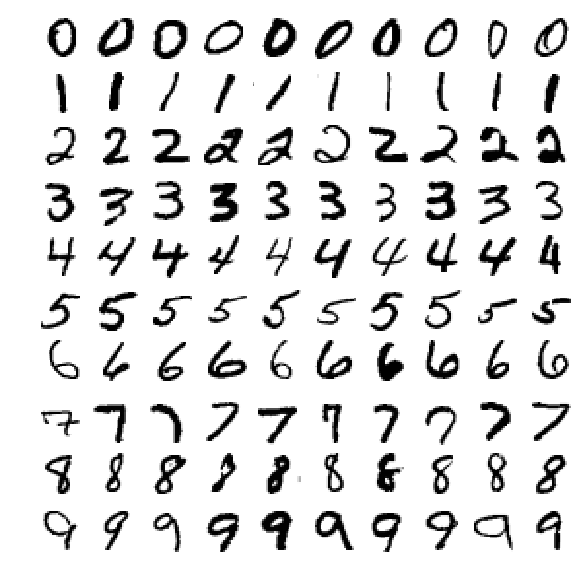

In [74]:
def P1(num_examples=10):

### STUDENT START ###

  # Create an empty array to store image data, sorted by digit
  digit_entries = np.empty((0, 784))
  # Iterate through digits 0-9
  for number in range(0,num_examples):
    # Boolean filter to locate digits (from the labels)
    filter_array = (mini_train_labels == str(number))
    # Apply boolean filter to training data, and append the first 10 entries
    filtered_array = mini_train_data[filter_array][:num_examples]
    digit_entries = np.append(digit_entries, filtered_array, axis=0)
  # Reshape vector into 2D matrix for rendering
  images = [item.reshape(28,28) for item in digit_entries]
  row_images = [] 
  # Data selection and transformation for visualization
  for row in range(num_examples):
    rimages = images[row * num_examples : (row + 1) * num_examples]
    row_images.append(np.concatenate(rimages, axis = 1))    
  image = np.concatenate(row_images, axis = 0) 
  plt.imshow(image, cmap = plt.cm.binary, interpolation = 'nearest')
  plt.axis('off')
  return
plt.figure(figsize=(10,10))

### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [75]:
def P2(k_values):

### STUDENT START ###
  # Accuracy score calculation
  print("Accuracy scores for classifier KNN")
  for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(mini_train_data, mini_train_labels)
    print("Accuracy score for k={}: {}".format(k, neigh.score(dev_data, dev_labels)))
  # Classification report
  print("\n\nClassification report for classifier KNN (k=1)")
  neigh = KNeighborsClassifier(n_neighbors=1)
  neigh.fit(mini_train_data, mini_train_labels)
  dev_pred = neigh.predict(dev_data)
  labels = [i for i in range(0,10)]
  print(classification_report(dev_labels, dev_pred, labels=labels))
  # Optional code: Confusion matrix
  # print("\n\nConfusion matrix for classifier KNN (k=1)")
  # print(confusion_matrix(dev_labels, dev_pred))  
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Accuracy scores for classifier KNN
Accuracy score for k=1: 0.884
Accuracy score for k=3: 0.876
Accuracy score for k=5: 0.882
Accuracy score for k=7: 0.877
Accuracy score for k=9: 0.875


Classification report for classifier KNN (k=1)
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000



ANSWER: The answer depends on our priorities - we can either prioritize precision or recall, or strike a balance by using the F1-score (the harmonic mean of precision and recall). Since we do not know anything about our use-case, we focus on the F1 score, which favors classifiers with similar precision and recall. From this, we can see that the digit '8' is the most difficult (F1 score of 0.8). Looking at the confusion matrix (optional code included) we find that '8' is often misclassified as '1', '2' or '9'.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [76]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    for size in train_sizes:
        # Define training set for different train_sizes
        train_data_var, train_labels_var = X[:size], Y[:size]
        start = time.time()
        # Fit classifier KNN with k=1
        neigh = KNeighborsClassifier(n_neighbors=1)
        neigh.fit(train_data_var, train_labels_var)
        end = time.time()
        elapsed = end - start
        # Calculate accuracy score
        score = neigh.score(dev_data, dev_labels)
        accuracies.append(score)
        print("Accuracy score for training set size {}: {}".format(size, score))
        print("Elapsed time: {0:4f} seconds\n".format(elapsed))
    return accuracies


### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Accuracy score for training set size 100: 0.702
Elapsed time: 0.001129 seconds

Accuracy score for training set size 200: 0.791
Elapsed time: 0.001787 seconds

Accuracy score for training set size 400: 0.811
Elapsed time: 0.004332 seconds

Accuracy score for training set size 800: 0.866
Elapsed time: 0.009782 seconds

Accuracy score for training set size 1600: 0.905
Elapsed time: 0.028036 seconds

Accuracy score for training set size 3200: 0.927
Elapsed time: 0.103427 seconds

Accuracy score for training set size 6400: 0.939
Elapsed time: 0.359986 seconds

Accuracy score for training set size 12800: 0.952
Elapsed time: 1.299575 seconds

Accuracy score for training set size 25000: 0.962
Elapsed time: 4.602003 seconds



[0.702, 0.791, 0.811, 0.866, 0.905, 0.927, 0.939, 0.952, 0.962]

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [77]:
def P4(pred_size):

### STUDENT START ###
    # Reshape features and labels as np arrays, to match required input of sklearn linear model
    x = np.asarray(train_sizes).reshape(-1,1)
    y = np.asarray(accuracies).reshape(-1,1)
    # Fit linear model to data
    reg = LinearRegression()
    reg.fit(x, y)
    print("Slope coefficient of estimator: {}".format(reg.coef_))
    print("R2 score: {}".format(reg.score(x, y)))
    # Predict regressand
    prediction = reg.predict(np.array([[pred_size]]))
    # Cap accuracy value at max 1
    if pred_size > 1:
      prediction = 1
    print("Prediction for n={}: {}".format(pred_size, prediction))
    

### STUDENT END ###

P4(60000)

Slope coefficient of estimator: [[6.83806142e-06]]
R2 score: 0.420268152171
Prediction for n=60000: 1


ANSWER: The regression output returns values greater than 1, which is not feasible given that accuracy can not exceed 1. Since we do not know at which threshold the predictor converges to accuracy 1, I have decided to cap the accuracy at 1.

(5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [78]:
def P5():

### STUDENT START ###

  neigh = KNeighborsClassifier(n_neighbors=1)
  neigh.fit(mini_train_data, mini_train_labels)
  dev_pred = neigh.predict(dev_data)
  print("\n\nConfusion matrix for classifier KNN (k=1)")
  print(confusion_matrix(dev_labels, dev_pred))  

    
### STUDENT END ###

P5()



Confusion matrix for classifier KNN (k=1)
[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


From the confusion matrix we can see that:
*   '4' is often misclassified as '9'
*   '9' is often misclassified as '7'
*   '2' is often misclassified as '8'
*   '3' is often misclassified as '5'




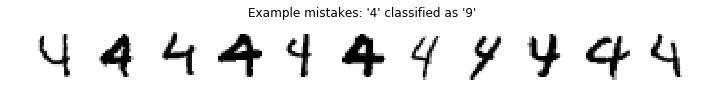

In [79]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(mini_train_data, mini_train_labels)
dev_pred = neigh.predict(dev_data)

cl_a = "4"
cl_b = "9"
X_aa = dev_data[(dev_labels == cl_a) & (dev_pred == cl_b)]


images = [item.reshape(28,28) for item in X_aa]
row_images = [] 
# Data selection and transformation for visualization
for row in range(1):
  rimages = images[0 : 11]
  row_images.append(np.concatenate(rimages, axis = 1))    
image = np.concatenate(row_images, axis = 0) 
plt.figure(figsize=(12,8))
plt.title("Example mistakes: '4' classified as '9'")
plt.imshow(image, cmap = plt.cm.binary, interpolation = 'nearest')
plt.axis('off')
pass




(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [0]:
# def P6():
    
### STUDENT START ###


### STUDENT END ###

# P6()

ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [81]:
def P7():

### STUDENT START ###
  # Fitting a Naive Bayes classifier
  gnb = GaussianNB()
  gnb.fit(mini_train_data, mini_train_labels)
  # Reporting accuracy on the dev data
  print("Accuracy score of Gaussian Naive Bayes on dev data: {}".format(gnb.score(dev_data, dev_labels)))

    
### STUDENT END ###

P7()

Accuracy score of Gaussian Naive Bayes on dev data: 0.593


In [82]:
def PBernoulli():

### STUDENT START ###
  # Fitting Bernoulli Naive Bayes classifier, setting threshold for binarization to 0.0
  bnb = BernoulliNB(binarize=0.0)
  bnb.fit(mini_train_data, mini_train_labels)
  # Reporting accuracy on the dev data
  print("Accuracy score of Bernoulli Naive Bayes on dev data (binarization threshold = 0.0): {}"\
        .format(bnb.score(dev_data, dev_labels)))

    
### STUDENT END ###

PBernoulli()

Accuracy score of Bernoulli Naive Bayes on dev data (binarization threshold = 0.0): 0.809


In [83]:
### STUDENT START ###

def PMultinomialNB():
  # Fitting a Multinomial Naive Bayes Classifier
  mnb = MultinomialNB()
  mnb.fit(mini_train_data_2, mini_train_labels)
  # Reporting accuracy on the binarized dev data
  print("Accuracy score of Multinomial Naive Bayes on dev data (binarization thresholds = 0.0, 1.0, 2.0): {}"\
        .format(mnb.score(dev_data_2, dev_labels)))
    
# Binarization preprocessing
mini_train_data_2 = np.copy(mini_train_data)
dev_data_2 = np.copy(dev_data)

def binarize(data):
  # All normalized greyscale values >0.9 count as "black"
  data[np.where(data > 0.9)] = 2
  # The remaining non-zero pixel values count as "grey"
  data[np.where((data > 0.0) & (data <= 0.9))] = 1
  return data


mini_train_data_2 = binarize(mini_train_data_2)
dev_data_2 = binarize(dev_data_2)

### STUDENT END ###

PMultinomialNB()

Accuracy score of Multinomial Naive Bayes on dev data (binarization thresholds = 0.0, 1.0, 2.0): 0.803


ANSWER: 
  * The binarized Bernoulli Naive Bayes classifier performs better than the Gaussian Naive Bayes classifier. Apparently, the classification profits from a classifier which just distinguished between black (or grey) and white pixel values.
  * The Multinomial Naive Bayes classifier (where I classified black as the normalized pixel values >0.9, and grey as the non-zero remainder) does not improve accuracy. Apparently the "grey pixel" information is not helpful for improving the classfier result.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [84]:
def P8(alphas):

### STUDENT START ###
  param_grid = [{'alpha': alphas['alpha']}]
  bnb = BernoulliNB()
  grid_search = GridSearchCV(bnb, param_grid, cv=5, return_train_score=False)
  
  grid_search.fit(dev_data, dev_labels)
  
  return grid_search

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print("Best estimator = {}".format(nb.best_estimator_))
print("Best parameter setting = {}".format(nb.best_params_))
print("Best accuracy score: {}".format(nb.best_score_))

# print("\nAll test results: {}".format(nb.cv_results_))

print("\nAccuracy for parameter 'alpha = 0': {}".format(nb.cv_results_['mean_test_score'][0]))


Best estimator = BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True)
Best parameter setting = {'alpha': 0.1}
Best accuracy score: 0.804

Accuracy for parameter 'alpha = 0': 0.795


ANSWER: Laplace smoothing adds "pseudocounts" of observed cases in order to allow for unforeseen events to the distribution. This makes the prior distribution more uniform compared to the non-smoothed alternative. In the case above, the accuracy for alpha = 0 (no smoothing) is slightly lower, indicating that regularization does have a small effect. Our model is better able to generalize to examples which it has not seen before.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [85]:
def P9():

### STUDENT END ###

  # Fitting a Naive Bayes classifier
  gnb = GaussianNB()
  gnb.fit(mini_train_data, mini_train_labels)
  # Reporting accuracy on the dev data
  print("Accuracy score of Gaussian Naive Bayes on dev data: {}".format(gnb.score(dev_data, dev_labels)))
  return gnb

### STUDENT END ###

gnb = P9()
print("Theta (mean of each feature per class) of Gaussian Naive Bayes Classifier: {}".format(gnb.theta_))
print("Sigma (variance of feature per class) of Gaussian Naive Bayes Classifier: {}".format(gnb.sigma_))
print("Class count (# training samples for each class): {}".format(gnb.class_count_))
print("Probability of each class: {}".format(gnb.class_prior_))

Accuracy score of Gaussian Naive Bayes on dev data: 0.593
Theta (mean of each feature per class) of Gaussian Naive Bayes Classifier: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Sigma (variance of feature per class) of Gaussian Naive Bayes Classifier: [[2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 ...
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]
 [2.01433307e-10 2.01433307e-10 2.01433307e-10 ... 2.01433307e-10
  2.01433307e-10 2.01433307e-10]]
Class count (# training samples for e

ANSWER:

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

In [0]:
#def P10(num_examples):

### STUDENT START ###


### STUDENT END ###

#P10(20)

ANSWER:

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [0]:
#def P11(buckets, correct, total):
    
### STUDENT START ###


                
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [0]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()